## 2

#### Haciendo unos cálculos rápidos en Excel:

Los resultados obtenidos según el conteo rápido (por porcentaje de votos):
+ Alfredo del Mazo Maza: 32.8086141275723%;
+ Delfina Gómez Álvarez: 31.2543796573219%;
+ Juan Manuel Zepeda Hernández: 18.1094536477679%;
+ Josefina Vázquez Mota: 11.3211565501353%;
+ Teresa Castell de Oro Palacios: 2.21513334768411%;
+ Óscar González Yáñez: 1.07987268059136%.

Los resultados obtenidos según el recuento oficial es (por porcentaje de votos):
+ Alfredo del Mazo Maza: 33.6925178052913%;
+ Delfina Gómez Álvarez: 30.91278857369%;
+ Juan Manuel Zepeda Hernández: 17.8913508368187%;
+ Josefina Vázquez Mota: 11.2752945836287%;
+ Teresa Castell de Oro Palacios: 2.14832997314094%;
+ Óscar González Yáñez: 1.07987268059136%.

Cualquier medición estadística está relacionada a un valor esperado y a una desviación estándar. Si bien los porcentajes del recuento definitivo tendrían que tener una $\sigma^2=0$, los valores asociados al conteo rápido tendrían que tener una $\sigma^2>0$.

En este sentido, el hecho que los valores entre los dos conteos no coincidan tiene todo el sentido del mundo. Esto debido a que el conteo rápido está hecho sobre una muestra representativa, cuyos valores esperados y desviaciones no es igual a aquellos del conjunto completo.

La prueba está que en el conteo final se tomaron en cuenta 6 079 513 votos, mientras que en el conteo rápido 436 678 votos, un 7.2% de los votos aprox.

La pregunta ahora es que tan representativa fue esta muestra. La diferencia entre los dos porcentajes está dado por (en orden tal como arriba, en valor absoluto):

In [2]:
abs([33.6925178052913-32.8086141275723, 
    30.91278857369-31.2543796573219, 
    17.8913508368187-18.1094536477679,
    11.2752945836287-11.3211565501353,
    2.14832997314094-2.21513334768411,
    1.07987268059136-1.07987268059136])

6-element Array{Float64,1}:
 0.883904 
 0.341591 
 0.218103 
 0.045862 
 0.0668034
 0.0      

Llama la atención que el porcentaje de votos del candidato Óscar González Yáñez se mantuvo constante.

### 3

Para analizar el patrón en el cual llegaron los datos, vamos a importarlos.

In [1]:
using PyPlot
using ExcelReaders

INFO: Precompiling module FixedPointNumbers.
INFO: Recompiling stale cache file /Users/Leo/.julia/lib/v0.5/PyPlot.ji for module PyPlot.


In [2]:
f = openxl("3b_remesa_estimacion_2110hrs_4jun2017.xlsx")

ExcelFile <3b_remesa_estimacion_2110hrs_4jun2017.xlsx>

In [4]:
Data = readxl(f, "Hoja 1!A6:AM1352");

Vamos a calcular las sumas acumuladas de votos con respecto al tiempo para cada candidato

In [60]:
CumSum = zeros(length(Data[2:end, 1]), 6); # N mediciones, 6 candidatos

# Alfredo del Mazo
# 15 diferentes combinaciones de voto
# Columnas 12, 15, 16, 18:29

CombinacionesPRI = [12, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

for col in CombinacionesPRI
    CumSum[1, 1] += Data[2, col]
end

for i = 3:length(Data[2:end, 1])+1
    CumSum[i-1, 1] += CumSum[i-2, 1]
    for col in CombinacionesPRI
        CumSum[i-1, 1] += Data[i, col]
    end
end

# Delfina
# 1 combinación, columna 17

CumSumEdoMex!(2, 17, CumSum, Data)

# Juan Zepeda
# 1 combinación, columna 13

CumSumEdoMex!(3, 13, CumSum, Data)

# Vázquez Sound
# 1 combinación, columna 11

CumSumEdoMex!(4, 11, CumSum, Data)

# Teresa Castell

CumSumEdoMex!(5, 30, CumSum, Data)

# Óscar González

CumSumEdoMex!(6, 14, CumSum, Data)

In [59]:
function CumSumEdoMex!(candidato, columna, CumSum, Data)
    CumSum[1, candidato] = Data[2, columna]
    for i = 3:length(Data[2:end, 1])+1
        CumSum[i-1, candidato] += Data[i, columna] + CumSum[i-2, candidato]
    end
end 

CumSumEdoMex! (generic function with 1 method)

#### Ahora vamos a calcular los porcentajes según fueron avanzando por hora

In [107]:
Porcentajes = zeros(size(CumSum)[1], 6)

for i = 1:size(CumSum)[1]
    Total_Votos = sum(CumSum[i, :])
    for candidato = 1:6
        Porcentajes[i, candidato] = 100*CumSum[i, candidato]/Total_Votos
    end
end

In [90]:
HoraCaptura = Array{DateTime}(1)

for i = 2:length(Data[2:end, 1])
    push!(HoraCaptura, DateTime(Data[i, end-3], "HH:MM:SS.sss"))
end

#### Vamos a hacer un pequeño plot para saber cómo se desarrolló

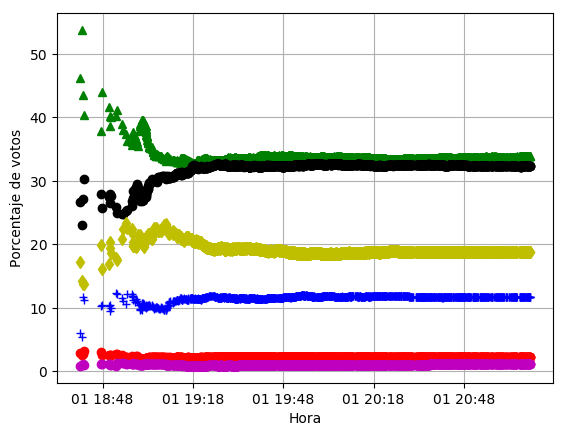

PyObject <matplotlib.text.Text object at 0x3256b5bd0>

In [118]:
plot(HoraCaptura[2:end], Porcentajes[2:end, 1], "g^")
plot(HoraCaptura[2:end], Porcentajes[2:end, 2], "ko")
plot(HoraCaptura[2:end], Porcentajes[2:end, 3], "yd")
plot(HoraCaptura[2:end], Porcentajes[2:end, 4], "b+")
plot(HoraCaptura[2:end], Porcentajes[2:end, 5], "ro")
plot(HoraCaptura[2:end], Porcentajes[2:end, 6], "mo")
grid()
xlabel("Hora")
ylabel("Porcentaje de votos")

#### (me siento como en el NYTimes)

#### Hay algo curioso con la primera hora de recabación de datos. Los primeros datos dan un promedio por encime del 40% de intención de voto hacia Alfredo del Mazo. Esto hace enseguida que los siguientes tres candidatos tengan resultados con un promedio bajo.

+ Al rededor de las 19 horas hay un aumento abrupto en el porcentaje de votos del Alfredo del Mazo. Curiosamente, este pico parece afectar tanto a Delfina como a Juan Zepeda y NO a Josefina. Esto último se puede deber a distintos factores: el bajo número de votos hacia Josefina, llegaron votos en el cual el espectro político se encuentra dividido entre el PRI, MORENA y el PRD, etc. En dado caso, es curioso que este pico llegue al inicio del conteo, una vez que los porcentajes ya están tendiendo al equilibrio. 

+ Una observación más: Parece que Juan Zepeda estaba peleando votos con los tres candidatos, mientras que Josefina solo con Juan Zepeda. Es notoria la simetria entre las curvas de voto entre Josefina y Juan Zepeda. Por otro lado, un aumento de este último significaba también un descenso de Delfina y Alfredo del Mazo 

### 4

Para saber si el instituto tomó una buena decisión, vamos a calcular qué tanto variaba el porcentaje de votos con respecto a un cierto intervalo de tiempo (10 min).

In [127]:
HoraInicial = HoraCaptura[2]

0001-01-01T18:40:22.539

Número de elementos en cada periodo de 10 minutos

In [132]:
ElementosFinales = Int64[]
Hora = HoraInicial + Dates.Minute(10)

for period = 1:15
    for i = 1:length(HoraCaptura)
        if HoraCaptura[i] >= Hora && HoraCaptura[i-1] < Hora
            push!(ElementosFinales, i)
        end
    end
    Hora += Dates.Minute(10)
end
push!(ElementosFinales, length(HoraCaptura))

15-element Array{Int64,1}:
   10
   28
   93
  174
  285
  428
  547
  690
  818
  925
 1015
 1106
 1203
 1277
 1346

In [138]:
Desviaciones = zeros(15, 6)

for candidato = 1:6
    Desviaciones[1, candidato] = std(Porcentajes[1:ElementosFinales[1], candidato])
end

for candidato = 1:6
    for period = 2:15
        Desviaciones[period, candidato] = std(Porcentajes[ElementosFinales[period-1]+1:ElementosFinales[period], candidato])
    end
end

+ Desviaciones antes de las 20 horas

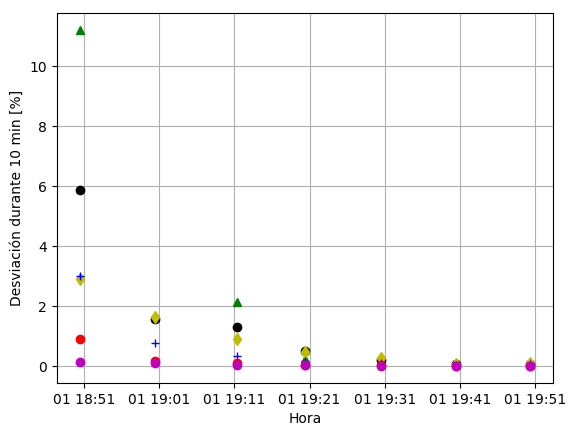

PyObject <matplotlib.text.Text object at 0x32b5cd490>

In [155]:
plot(HoraCaptura[ElementosFinales[1:7]], Desviaciones[1:7, 1], "g^")
plot(HoraCaptura[ElementosFinales[1:7]], Desviaciones[1:7, 2], "ko")
plot(HoraCaptura[ElementosFinales[1:7]], Desviaciones[1:7, 3], "yd")
plot(HoraCaptura[ElementosFinales[1:7]], Desviaciones[1:7, 4], "b+")
plot(HoraCaptura[ElementosFinales[1:7]], Desviaciones[1:7, 5], "ro")
plot(HoraCaptura[ElementosFinales[1:7]], Desviaciones[1:7, 6], "mo")
grid()
xlabel("Hora")
ylabel("Desviación durante 10 min [%]")

+ Desviaciones después de las 20 horas

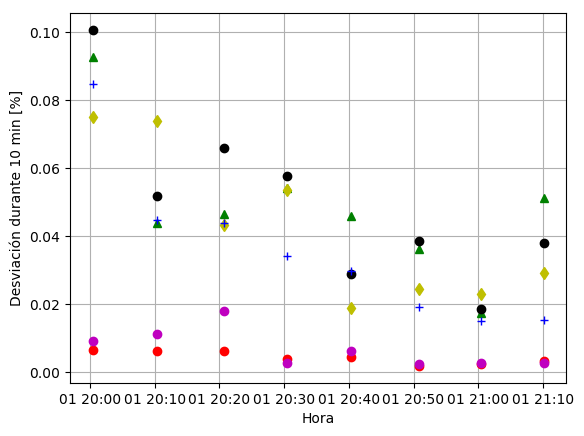

PyObject <matplotlib.text.Text object at 0x32b747b90>

In [157]:
plot(HoraCaptura[ElementosFinales[8:end]], Desviaciones[8:end, 1], "g^")
plot(HoraCaptura[ElementosFinales[8:end]], Desviaciones[8:end, 2], "ko")
plot(HoraCaptura[ElementosFinales[8:end]], Desviaciones[8:end, 3], "yd")
plot(HoraCaptura[ElementosFinales[8:end]], Desviaciones[8:end, 4], "b+")
plot(HoraCaptura[ElementosFinales[8:end]], Desviaciones[8:end, 5], "ro")
plot(HoraCaptura[ElementosFinales[8:end]], Desviaciones[8:end, 6], "mo")
grid()
xlabel("Hora")
ylabel("Desviación durante 10 min [%]")

Si tomamos el promedio del porcentaje de votos de los dos candidatos puntos durante el último periodo de tiempo, obtenemos que:

+ Alfredo del Mazo: 33.83%$\pm$0.05%

+ Delfina Gómez: 32.31%$\pm$0.03%

Ya había elementos para llamar al ganador de la elección. Sin embargo, al haber menos de 1% entre los dos punteros, el llamar al ganador es bastante arriesgado. Sobre todo teniendo en cuenta que estos análisis son solo sobre una muestra estadística y no el conjunto completo. También, sabiendo lo diverso que es el Estado de México y observando picos como los vistos en la gráfica sobre la evolución temporal de los porcentajes. Un pico como estos podría volver a pasar, rompiendo el equilibrio. 



Una razón para llamar podría ser que aquellos municipios donde hubo "picos" se contaron al inicio para después obtener una entrada de listas más homogénea.

Otra razón, aunque no tiene valor estadístico, es que recibieron presión política para llamar lo antes posible al ganador.

### 5

Inconsistencias que se me podrían pasar:

+ Número de votos es mayor a la lista nominal;

+ Suma de votos no es igual al total mostrado;

+ Actividad inusual en una de las casillas (muy alto porcentaje de voto).

In [ ]:
CasillasInconsistentes = Int64[]

In [167]:
# Número de votos vs lista nominal

for i = length(Data[:, 1])
    if Data[i, 10] <= Data[i, end-6]
        push!(CasillasInconsistentes, i)
    end
end

length(CasillasInconsistentes)

0

No hubo más votos que personas, ¡qué bien!

In [169]:
# Suma total de votos no da

for i = length(Data[:, 1])
    if sum(Data[i, 11:end-7]) != Data[i, end-6]
        push!(CasillasInconsistentes, i)
    end
end

length(CasillasInconsistentes)

0

¡Tampoco hubo alguien que se equivocó al sumar!

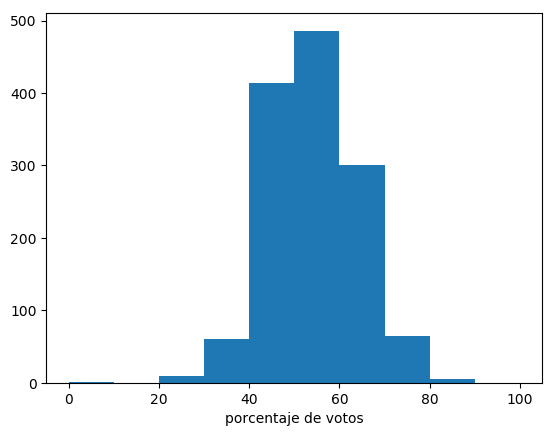

PyObject <matplotlib.text.Text object at 0x32d142d50>

In [208]:
# Actividad de las casillas

PorcentajeActividadCasillas = Float64[]

for i = 2:length(Data[:, 1])
    push!(PorcentajeActividadCasillas, 100*Data[i, end-6]/Data[i, 10])
end

PyPlot.plt[:hist](PorcentajeActividadCasillas, range=[0, 100])
xlabel("porcentaje de votos")

In [213]:
mean(PorcentajeActividadCasillas), std(PorcentajeActividadCasillas)

(53.993480926452236,9.697673764090156)

Encontramos una distribución que tiene cara de gaussiana. Esto es justo lo que estabamos esperando. Sin embargo, llama la atención aquellas casillas que tienen una actividad menor al 10%.

In [214]:
for (idx, porcentaje) in enumerate(PorcentajeActividadCasillas)
    if porcentaje < 10
        println(idx)
    end
end


79


Solo la casilla correspondiente a

In [221]:
Data[80, :]

39-element DataArrays.DataArray{Any,1}:
   22.0                   
 2719.0                   
     "B"                  
    1.0                   
    0.0                   
    1.0                   
   58.0                   
     "NAUCALPAN DE JUAREZ"
   30.0                   
  179.0                   
    6.0                   
    2.0                   
    0.0                   
    ⋮                     
    0.0                   
    0.0                   
    0.0                   
    0.0                   
    0.0                   
   10.0                   
     "2017-06-04"         
     "19:04:31.788"       
     "19:09:01.013"       
     "cap-105"            
     "22-66"              
 2748.0                   

Llama la atención que en una casilla de la zona metrolopitana solo diez personas haya votado cuando 179 pudieron haberlo hecho.

Veamos ahora qué candidatos fueron votados en aquellas casillas con mayor porcentaje con respecto al valor esperado + desviación estándar

In [224]:
CasillasMayorActividad = Int64[]

for (idx, porcentaje) in enumerate(PorcentajeActividadCasillas)
    if porcentaje > mean(PorcentajeActividadCasillas)+std(PorcentajeActividadCasillas)
        push!(CasillasMayorActividad,idx)
    end
end

In [228]:
VotosMayorActividad = zeros(length(CasillasMayorActividad), 6)

for col in CombinacionesPRI
    for (idx, casilla) in enumerate(CasillasMayorActividad)
        VotosMayorActividad[idx, 1] += Data[casilla+1, col]
    end
end

for (idx, casilla) in enumerate(CasillasMayorActividad)
    VotosMayorActividad[idx, 2] += Data[casilla+1, 17]
    VotosMayorActividad[idx, 3] += Data[casilla+1, 13]
    VotosMayorActividad[idx, 4] += Data[casilla+1, 11]
    VotosMayorActividad[idx, 5] += Data[casilla+1, 30]
    VotosMayorActividad[idx, 6] += Data[casilla+1, 14]
end

In [230]:
for i = 1:6
    println([mean(VotosMayorActividad[:, i]), std(VotosMayorActividad[:, i])])
end

[145.74,59.933]
[97.9461,48.0235]
[62.1275,40.2015]
[42.6225,27.7197]
[7.9951,5.00787]
[5.62255,5.74925]


Observamos como la ventaja de Alfredo del Mazo en estas casillas es significicamente mayor. Mientras que en los resultados generales la diferencia entre estos dos es de 3%, en estos resultados se aprecia una diferencia mayor. 

Otro dato es muy relevante. la desviación estándar para todos los candidatos en estas casillas es cercano o mayor al 50% de su valor esperado. Sin embargo, para Alfredo del mazo, su desviación estándar es del 41.1%.

#### Casillas de menor votación

In [234]:
CasillasMenorActividad = Int64[]

for (idx, porcentaje) in enumerate(PorcentajeActividadCasillas)
    if porcentaje < mean(PorcentajeActividadCasillas)-std(PorcentajeActividadCasillas)
        push!(CasillasMenorActividad,idx)
    end
end

VotosMenorActividad = zeros(length(CasillasMenorActividad), 6)

for col in CombinacionesPRI
    for (idx, casilla) in enumerate(CasillasMenorActividad)
        VotosMenorActividad[idx, 1] += Data[casilla+1, col]
    end
end

for (idx, casilla) in enumerate(CasillasMenorActividad)
    VotosMenorActividad[idx, 2] += Data[casilla+1, 17]
    VotosMenorActividad[idx, 3] += Data[casilla+1, 13]
    VotosMenorActividad[idx, 4] += Data[casilla+1, 11]
    VotosMenorActividad[idx, 5] += Data[casilla+1, 30]
    VotosMenorActividad[idx, 6] += Data[casilla+1, 14]
end

for i = 1:6
    println([mean(VotosMenorActividad[:, i]), std(VotosMenorActividad[:, i])])
end

[83.2042,22.9985]
[83.9843,22.8997]
[46.9215,27.1551]
[22.3874,15.0549]
[5.31937,3.22124]
[2.20419,1.86242]


En estas casillas encontramos otra distribución del voto. Alfredo del Mazo y Delfina están prácticamente empatados (incluso tomando en cuenta sus desviaciones estándar). Notamos aquí como las desviaciones estándar significan un 50% o más del valor esperado para los demás candidatos. Para Alfredo del Mazo y Delfina, esta significa poco más del 27%.

#### Me encantaría seguir analizando los resultados, pero ya se me acabó el tiempo. Sin embargo, aquí está lo que me hubiera gustado hacer:

+ Buscar si todas las casillas se contaron una única vez;

+ Comparar las casillas del conteo rápido con los resultados finales;

+ Utilizando la base de datos de las casillas, primero ver que coincidan (¡casilla por casilla!) y luego ver que los datos de la lista nominal coincidan.

+ A partir de la lista nominal y con los porcentajes históricos de voto, estimar cual es el porcentaje de voto que se esperaría para una elección. A partir de eso comparar con los datos obtenido y observar si hay diferencias significativas.